In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
os.makedirs("plots", exist_ok=True)
experiments = [
    ("MATD3",     "models/MATD3/training_scores_history.npy"),
    ("MATD3_V2",  "models/MATD3_V2/training_scores_history_V2.npy"),
    ("MATD3_V3",  "models/MATD3_V3/training_scores_history_V3.npy"),
    ("MATD3_V4",  "models/MATD3_V4/training_scores_history_V4.npy"),
    ("MADDPG_V1", "models/MADDPG_V1/training_scores_history_V1.npy"),
]

In [ ]:
TARGET_SCORE = -60  

for name, path in experiments:
    scores = np.load(path)
    last_two_mean = scores[-2:].mean()
    max_score = np.max(scores)

    plt.figure(figsize=(10, 5))
    plt.plot(scores, label=f"{name} Training Score", color="blue")
    plt.axhline(TARGET_SCORE, color="red", linestyle="--", label=f"Target = {TARGET_SCORE}")
    plt.axhline(max_score, color="black", linestyle="--", label=f"Max Score = {max_score:.2f}")

    plt.text(
        0.99, 0.21, f"Last 2 mean = {last_two_mean:.2f}",
        transform=plt.gca().transAxes, fontsize=10, color="green", ha="right")

    plt.title(f"{name} - Training Score History")
    plt.xlabel("Evolution Step")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    out_file = f"plots/{name}_training_scores.png"
    plt.savefig(out_file, dpi=200)
    plt.close()  

    print(f"{name}: saved plot to {out_file}, last2 mean={last_two_mean:.2f}")

MATD3: saved plot to plots/MATD3_training_scores.png, last2 mean=-67.41
MATD3_V2: saved plot to plots/MATD3_V2_training_scores.png, last2 mean=-50.18
MATD3_V3: saved plot to plots/MATD3_V3_training_scores.png, last2 mean=-42.88
MATD3_V4: saved plot to plots/MATD3_V4_training_scores.png, last2 mean=-29.37
MADDPG_V1: saved plot to plots/MADDPG_V1_training_scores.png, last2 mean=-44.37


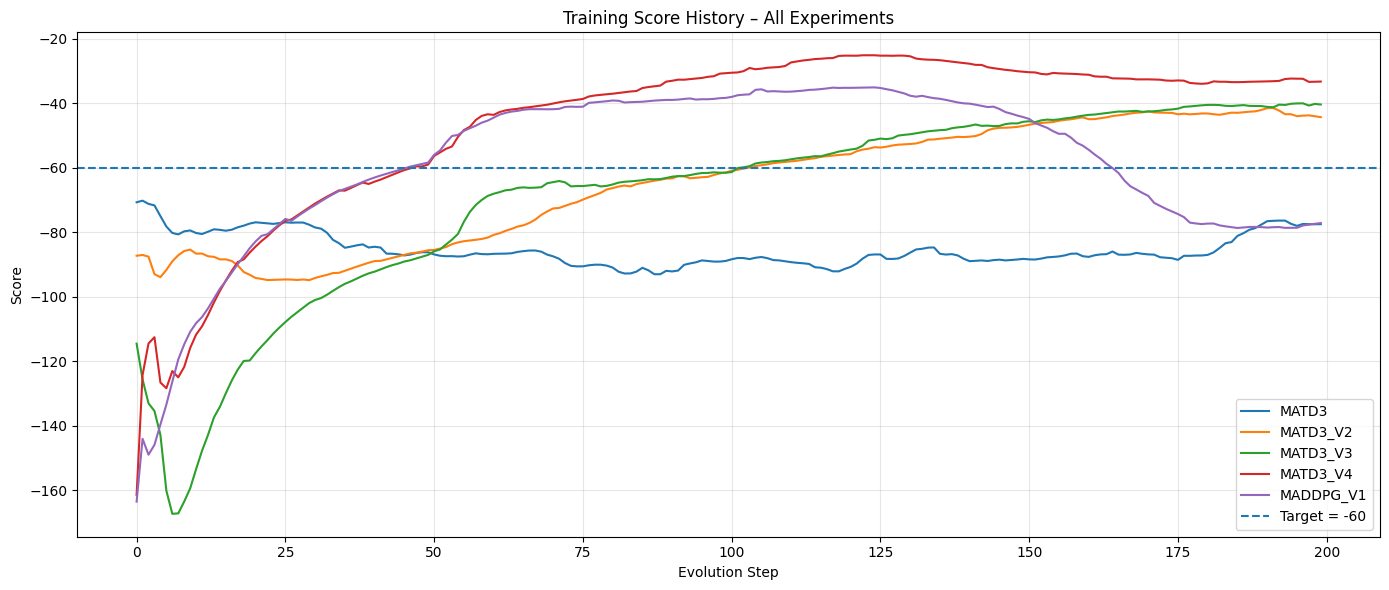

In [23]:
out_file = f"plots/all_training_scores.png"
TARGET_SCORE = -60
WINDOW = 50   
 
plt.figure(figsize=(14, 6))
for name, path in experiments:
    scores = np.load(path)
    smooth = pd.Series(scores).rolling(WINDOW, min_periods=1).mean()
    plt.plot(smooth, label=f"{name}")
plt.axhline(TARGET_SCORE, linestyle="--", label=f"Target = {TARGET_SCORE}")
plt.title("Training Score History – All Experiments")
plt.xlabel("Evolution Step")
plt.ylabel("Score")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(out_file, dpi=200)
plt.show()